# Water Consumption Forecasting Assigment

## Background:
The goal of this assignment is to develop a reliable model
for forecasting the daily water consumption in a city for the next two
years.

## Data Description:
Time-series dataset containing hourly water usage data from 2002 to 2016.

## Report:
The jnotebook was created in google colab with python 3 and CPU setting.

After research we concluding on using ARIMA model for our predictions, ARIMA (AutoRegressive Integrated Moving Average) is a traditional time series forecasting model that combines autoregressive (AR) and moving average (MA) components with differencing to make time series data stationary. It's a good choice for water consumption forecasting because it can capture linear relationships and seasonality patterns in historical consumption data, making it suitable for short to medium-term forecasts.

We started by loading the libaries and data and had a look in the data about any null or duplicated values. Then we made some plots about the data in weekly and daily aspect.

In the modeling part, we had to create a train and test datasets to train our model and evalute it and ,also, made some analysis to figure out the best p,d,q parameters for the ARIMA model. After that we used walk-forward validation to evaluate our model and see if the parameters needs adjusting in order to reach the final 2 years forecasting.

## Conclusion:
We end up with a statistical model that can adapt to the trend and data we gave it and give us very good predictions for the future. That can be seen by the evaluation metrics and the prediction line plot.

# Import Libraries

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# cell output clear tool
from IPython.display import clear_output

# data
import pandas as pd
import numpy as np

# visualisations
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

# sklearn metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# mount google drive
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/PublicFolder')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data and Data Preprocessing

In [ ]:
# load dataset
data = pd.read_csv("water.csv")
original_data = data.copy()
data.head()

,Datetime,Consumption
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
# get info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131470 entries, 0 to 131469
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     131470 non-null  object 
 1   Consumption  131470 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
# see if there are duplicates rows in the data
sum(data.duplicated())

0

In [ ]:
# some stats about the dataset
data.describe()

,Consumption
count,131470.000000
mean,32187.086476
std,6489.679293
min,14544.000000
25%,27664.000000
50%,31543.500000
75%,35761.750000
max,62009.000000


<Axes: title={'center': 'Weekly Consumptions'}, xlabel='Datetime'>

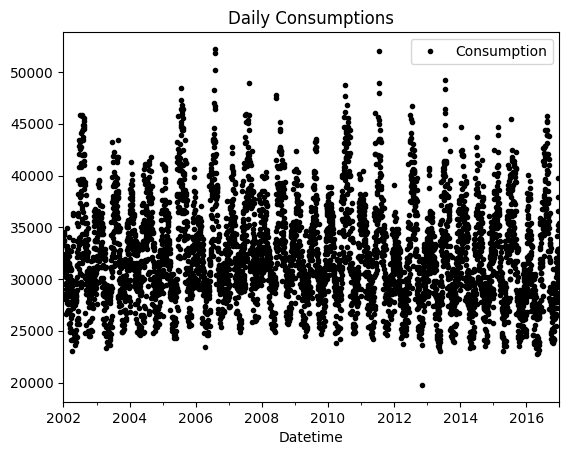

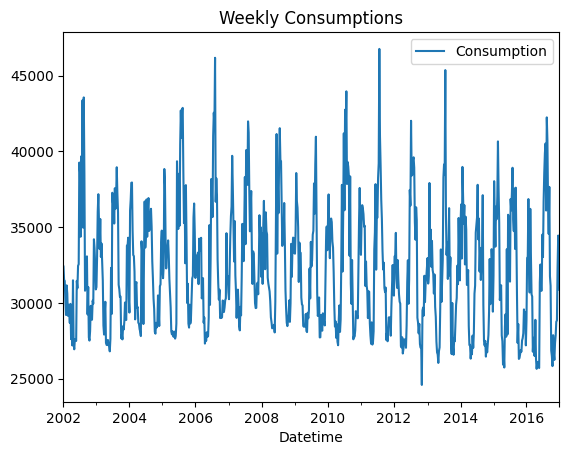

In [ ]:
# make datetime as the index for the resample method to work
data['Datetime'] = pd.to_datetime(data.Datetime)
data = data.set_index('Datetime')
data.sort_index(inplace=True)

# create datasets per month,year,day for later
data_per_day = data.resample('d').mean()
data_per_week = data.resample('w').mean()
data_per_month = data.resample('m').mean()

# plot daily and weekly consumptions
data.resample('d').mean().plot(style='k.', title = 'Daily Consumptions')
data.resample('w').mean().plot(title = 'Weekly Consumptions')

# Creating the ARIMA model

In [ ]:
# Config

# main data to use for our model (month, weekly, daily or hourly)
main_data = data_per_month.copy()

# start and end date of train and test periods
trainStart = '2002'
trainEnd = '2013'

testStart = '2014'
testEnd = '2016'

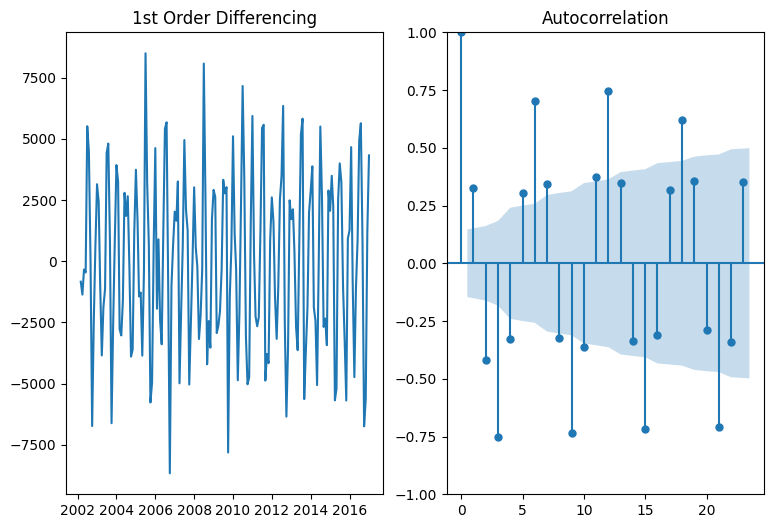

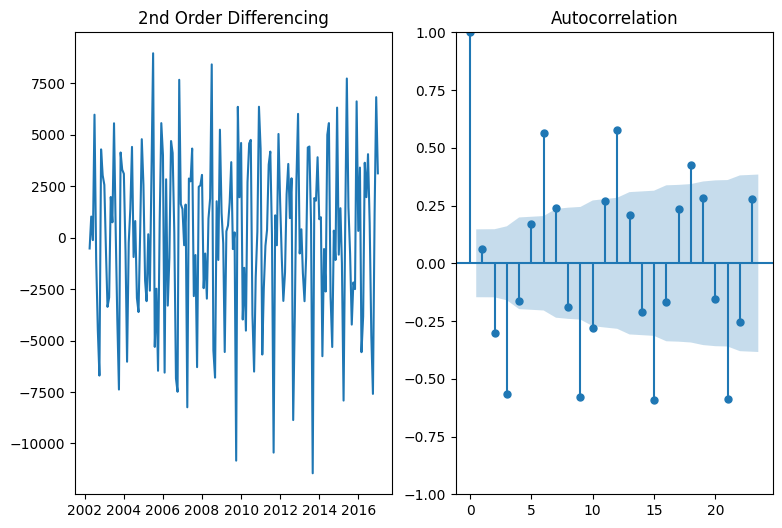

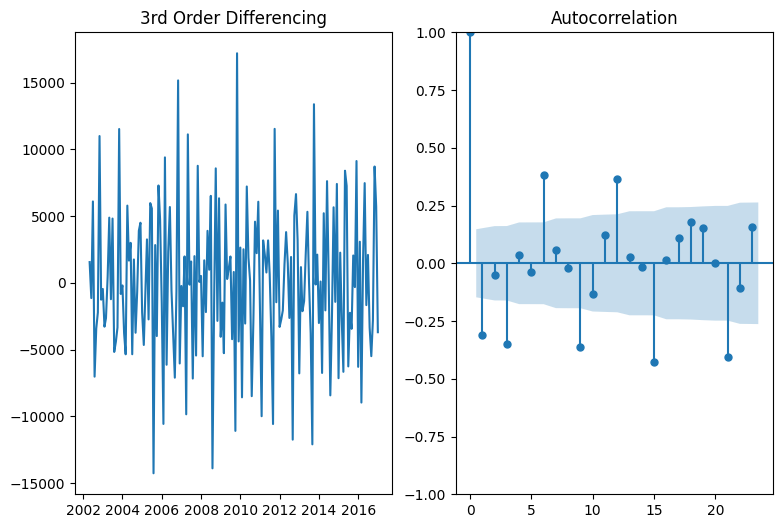

In [ ]:
#1st order
f = plt.figure(figsize=(9,6))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(main_data.Consumption.diff())

ax2 = f.add_subplot(122)
plot_acf(main_data.Consumption.diff().dropna(), ax=ax2)
plt.show()

#2nd order
f = plt.figure(figsize=(9,6))
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(main_data.Consumption.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(main_data.Consumption.diff().diff().dropna(), ax=ax2)
plt.show()

#3rd order
f = plt.figure(figsize=(9,6))
ax1 = f.add_subplot(121)
ax1.set_title('3rd Order Differencing')
ax1.plot(main_data.Consumption.diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(main_data.Consumption.diff().diff().diff().dropna(), ax=ax2)
plt.show()

In [ ]:
# split into train and test sets
train, test = main_data[trainStart:trainEnd].values, main_data[testStart:testEnd].values
history = [x for x in train]
predictions = list()

In [ ]:
# walk-forward validation
for t in range(len(test)):
  model = ARIMA(history, order=(6,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

predicted=34858.987964, expected=36688.553763
predicted=34195.595135, expected=34801.150298
predicted=32110.189799, expected=32360.328398
predicted=31021.244441, expected=27300.355556
predicted=28368.982729, expected=27235.440860
predicted=29789.357139, expected=32735.425000
predicted=35279.130227, expected=35368.552419
predicted=34298.786073, expected=32686.147849
predicted=30205.184006, expected=30343.295833
predicted=28242.604609, expected=26913.254032
predicted=27668.178108, expected=29800.558946
predicted=32903.801335, expected=31859.784946
predicted=33079.701561, expected=35347.876344
predicted=33836.676909, expected=37584.837798
predicted=35412.372748, expected=31903.125168
predicted=29495.757898, expected=26698.023611
predicted=27832.810678, expected=29224.900538
predicted=31917.260869, expected=33220.606944
predicted=35500.911262, expected=36437.774194
predicted=36278.105668, expected=35428.607527
predicted=31891.093699, expected=32239.588889
predicted=29671.545997, expected=2

In [ ]:
mape = mean_absolute_percentage_error(test, predictions)
mae = mean_absolute_error(test, predictions)
rmse = mean_squared_error(test, predictions, squared=False)

import pprint
pprint.pprint({'mape': mape,
               'mae': mae,
               'rmse': rmse})

{'mae': 1731.5877751036123,
 'mape': 0.055588226823048204,
 'rmse': 2093.1003626458887}


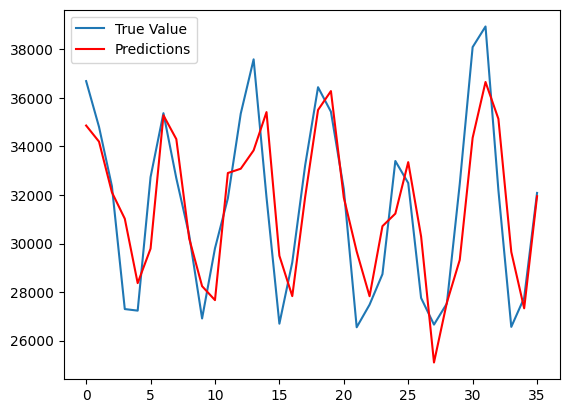

In [ ]:
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['True Value', 'Predictions'])
plt.show()

## Next 2 years forcasting (2017-2018)

In [ ]:
# init
history = [x for x in main_data.values]
predictions = list()

# walk-forward validation
for t in range(0, 24, 1):
  model = ARIMA(history, order=(6,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  history.append(np.array([yhat]))
  print(output)

[35717.24988174]
[35537.65377583]
[31687.72405526]
[28664.67267225]
[29359.19717759]
[32202.67919228]
[34324.6695596]
[33921.27141271]
[31612.85586815]
[29942.75998015]
[30427.6565014]
[32212.94435259]
[33444.69086991]
[33069.63692747]
[31648.56782193]
[30697.52247706]
[31053.64296665]
[32164.66093683]
[32873.28377641]
[32579.0028071]
[31702.24732944]
[31162.12976574]
[31420.58695614]
[32108.28903198]


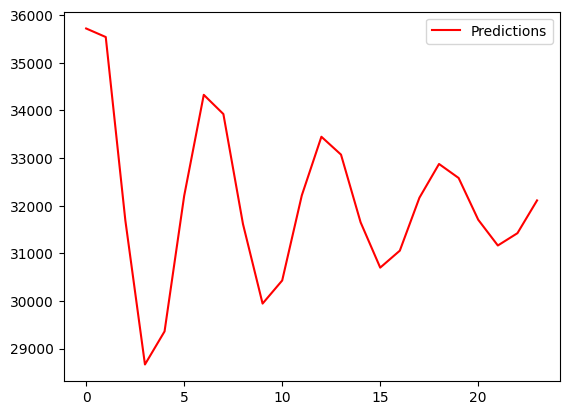

In [ ]:
# plot forecasts
plt.plot(predictions, color='red')
plt.legend(['Predictions'])
plt.show()